まずはハウンジングデータの読み込んで、訓練データとテストデータに分離

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../../data/housing/housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIME', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

残差プロットを表示

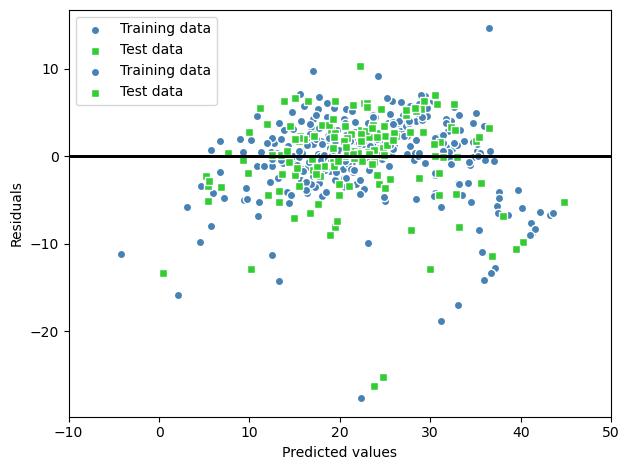

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

平均二乗誤差を計算

In [6]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


平均二乗誤差は特徴量のサイズに依存するので、決定係数のスコアを出力

1で完全一致

In [7]:
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


1 で完全一致。テストの成績が悪いので過学習状態にある

正則化を行って、過学習に対応する

まずはリッジ回帰 (L2ペナルティ付きのモデル)

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.760, test: 0.687


LASSO回帰（L1ペナルティ付きのモデル）

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X, y)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.705, test: 0.629


ElasticNet実装 (L1 と L2 を組み合わせる)

In [10]:
from sklearn.linear_model import ElasticNet

ela = ElasticNet(alpha=1.0, l1_ratio=0.5)
ela.fit(X, y)
y_train_pred = ela.predict(X_train)
y_test_pred = ela.predict(X_test)

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.708, test: 0.633
